# Installing necessary libraries


Import necessary Python libraries required for data handling, machine learning model building, computation and creating visuals.

In [28]:
#pip install textblob
#pip install wordcloud


SyntaxError: invalid syntax (1681500961.py, line 3)

In [2]:
import json
import numpy as np
import pandas as pd
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
import nltk


# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /Users/billpark/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/billpark/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/billpark/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/billpark/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Data preparation
* loading data from JSON files and cleaning text data. These functions help modularize the code for better readability and reuse.

In [194]:
# Function to load JSON data into a DataFrame
def load_json_to_df(json_file):
    with open(json_file, 'r') as file:
        data = json.load(file)
    return pd.DataFrame.from_dict(data, orient='index')

# List of JSON files
json_files = ['HR_prep.json', 'HF_prep.json', 'MR_prep.json', 'MF_prep.json', 'PHF.json', 'PHR.json', 'PMF.json', 'PMR.json']
dfs = []

# Load each JSON file into a DataFrame and store them in a list
for json_file in json_files:
    df_path = f'data/{json_file}'  # Corrected file path string formation
    df = load_json_to_df(df_path)
    dfs.append(df)

# Naming the DataFrames, ensure you have all 8 DataFrames named if using them distinctly
HR_prep_df, HF__prep_df, MR__prep_df, MF_prep_df, PHF_df, PHR_df, PMF_df, PMR_df = dfs


In [195]:
HR = HR_df['preprocessed_text']
HF = HF_df['preprocessed_text']
MR = MR_df['preprocessed_text']
MF = MF_df['preprocessed_text']

# Extracting 'text' columns for PolitiFact datasets
PHR = PHR_df['text']
PHF = PHF_df['text']
PMR = PMR_df['text']
PMF = PMF_df['text']

In [196]:
df = pd.concat([HR, HF, MR, MF], ignore_index=True)

# Most Common words

-One of the feedbacks that we recieved from the practicum presentation last week was to see what are the trends and possible 

-In this section we explored the differences in the most common words between groups.

We noticed a lot of overlap between the two human-authored groups and much less overlap when compared to the AI text.

In [197]:
from nltk import FreqDist
from collections import Counter

# Function to load and tokenize the text from a DataFrame
def load_and_tokenize_text(json_file):
    df = load_json_to_df(json_file)
    # Tokenize each item in the 'text' column
    df['tokens'] = df['preprocessed_text'].apply(word_tokenize)
    return df

# List of JSON files
json_files = ['HR_prep.json', 'HF_prep.json', 'MR_prep.json', 'MF_prep.json']
category_data = []

# Load and tokenize each JSON file into a DataFrame and store them in a list
for json_file in json_files:
    df = load_and_tokenize_text('data/' + json_file)
    category_data.append(df)

# Extract tokenized words for each category
tokens_hr = [token for sublist in category_data[0]['tokens'] for token in sublist]
tokens_hf = [token for sublist in category_data[1]['tokens'] for token in sublist]
tokens_mr = [token for sublist in category_data[2]['tokens'] for token in sublist]
tokens_mf = [token for sublist in category_data[3]['tokens'] for token in sublist]

# Function to display common words within a specific frequency range
def display_common_words(tokens, category_name, min_freq, max_freq):
    # Calculate frequencies of words
    freq_dist = FreqDist(tokens)

    # Filter words within the frequency range and sort by frequency
    filtered_words = {word: count for word, count in freq_dist.items() if min_freq <= count <= max_freq}
    sorted_filtered_words = dict(sorted(filtered_words.items(), key=lambda item: item[1], reverse=True))

    # Display the filtered and sorted words
    print(f"Top common words in {category_name} with frequencies between {min_freq} and {max_freq}:")
    for word, freq in sorted_filtered_words.items():
        print(f"{word}: {freq}")
    print("\n")

# Example usage
display_common_words(tokens_hr, "Human Real", 100, 2000)
display_common_words(tokens_hf, "Human Fake", 100, 2000)
display_common_words(tokens_mr, "Machine Real", 100, 2000)
display_common_words(tokens_mf, "Machine Fake", 100, 2000)


Top common words in Human Real with frequencies between 100 and 2000:
together: 1999
instagram: 1959
got: 1905
much: 1867
thats: 1866
news: 1846
well: 1842
couple: 1841
come: 1834
film: 1817
good: 1812
shes: 1795
child: 1778
night: 1766
relationship: 1732
didnt: 1731
take: 1723
never: 1721
could: 1721
feel: 1717
episode: 1698
still: 1697
little: 1675
world: 1674
award: 1666
wedding: 1663
since: 1621
another: 1617
prince: 1610
month: 1603
week: 1591
baby: 1590
right: 1547
work: 1528
lot: 1486
girl: 1463
he: 1454
big: 1451
always: 1449
actor: 1444
daughter: 1437
home: 1432
yearold: 1428
movie: 1421
shared: 1408
many: 1384
something: 1376
part: 1334
actress: 1317
three: 1312
find: 1300
around: 1273
next: 1271
set: 1266
tv: 1261
royal: 1248
later: 1233
tell: 1233
harry: 1226
character: 1225
source: 1219
song: 1210
ever: 1205
took: 1201
end: 1196
youre: 1182
wrote: 1181
went: 1179
moment: 1179
post: 1177
medium: 1174
according: 1160
ive: 1149
meghan: 1142
black: 1138
live: 1137
watch: 1122


In [198]:
from nltk import FreqDist

# Combine all tokens from each dataset
all_tokens = tokens_hr + tokens_hf + tokens_mr + tokens_mf

# Calculate the frequency distribution of all tokens
freq_dist = FreqDist(all_tokens)

# Filter tokens by frequency range
filtered_tokens = {word for word, count in freq_dist.items() if 100 <= count <= 2000}


In [199]:
def filter_text(text, filtered_vocab):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Filter tokens based on the frequency-filtered vocabulary
    filtered_text = ' '.join([token for token in tokens if token in filtered_vocab])
    return ' '.join(filtered_text)


In [200]:
# Assuming HR_df, HF_df, MR_df, MF_df are the original DataFrames containing a 'preprocessed_text' column
HR_df['filtered_text'] = HR_df['preprocessed_text'].apply(lambda text: filter_text(text, filtered_tokens))
HF_df['filtered_text'] = HF_df['preprocessed_text'].apply(lambda text: filter_text(text, filtered_tokens))
MR_df['filtered_text'] = MR_df['preprocessed_text'].apply(lambda text: filter_text(text, filtered_tokens))
MF_df['filtered_text'] = MF_df['preprocessed_text'].apply(lambda text: filter_text(text, filtered_tokens))


In [201]:
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from collections import Counter

# Function to tag parts of speech and calculate frequency distribution
def analyze_pos_frequencies(tokens):
    # Tagging parts of speech
    pos_tags = pos_tag(tokens)
    
    # Counting frequencies of each POS tag
    pos_tag_counts = Counter(tag for word, tag in pos_tags)
    
    return pos_tag_counts

# Function to create a DataFrame from POS tag frequencies
def create_pos_frequency_table(pos_tag_counts_hr, pos_tag_counts_hf, pos_tag_counts_mr, pos_tag_counts_mf):
    # Combine all POS tag counts into a single dictionary with category as keys
    data = {
        'Human Real': pos_tag_counts_hr,
        'Human Fake': pos_tag_counts_hf,
        'Machine Real': pos_tag_counts_mr,
        'Machine Fake': pos_tag_counts_mf
    }
    
    # Create a DataFrame from the dictionary
    # Use .fillna(0) to replace NaN values with 0 where tags do not appear in some datasets
    df = pd.DataFrame(data).fillna(0)
    
    # Convert float counts to integer if they exist due to fillna
    df = df.astype(int)
    
    return df

# Assuming you have these frequency dictionaries already calculated
pos_tag_counts_hr = analyze_pos_frequencies(tokens_hr)
pos_tag_counts_hf = analyze_pos_frequencies(tokens_hf)
pos_tag_counts_mr = analyze_pos_frequencies(tokens_mr)
pos_tag_counts_mf = analyze_pos_frequencies(tokens_mf)

# Create the POS frequency table
pos_frequency_table = create_pos_frequency_table(pos_tag_counts_hr, pos_tag_counts_hf, pos_tag_counts_mr, pos_tag_counts_mf)

# Display the DataFrame
print(pos_frequency_table)



      Human Real  Human Fake  Machine Real  Machine Fake
NN        547132      476295        411550        219405
NNS        32604       29396         21151         11595
VBP        42449       38306         25012         15118
JJ        226548      193529        170542         92377
RB         73837       71562         54342         34606
VBZ         9496        8804          8864          4955
JJS         5650        5111          3583          2404
CD         14277       12345          8472          5357
RBS          376         292           221           126
VBN        31320       27290         26049         13740
VBD        81070       70472         59693         32697
VBG        55996       51585         53455         31383
IN         23788       21289         17216         10242
FW          2889        2325          1772           642
VB         25299       24302         14914         10538
RBR         2442        2059          1691           753
MD          8413        8541   

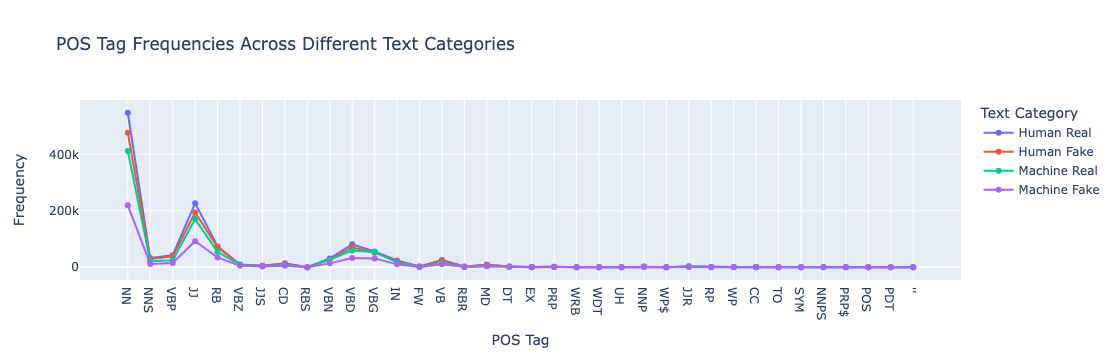

In [202]:
import plotly.graph_objects as go

# Function to create an interactive line chart for POS tags
def create_interactive_pos_chart(df):
    # Create a figure
    fig = go.Figure()

    # Add traces for each category
    for column in df.columns:
        fig.add_trace(go.Scatter(
            x=df.index, 
            y=df[column], 
            mode='lines+markers',
            name=column  # Name used in the legend and hover information
        ))

    # Update layout
    fig.update_layout(
        title='POS Tag Frequencies Across Different Text Categories',
        xaxis_title='POS Tag',
        yaxis_title='Frequency',
        legend_title='Text Category',
        hovermode='x'
    )

    # Show the figure
    fig.show()

# Assuming pos_frequency_table is already defined
create_interactive_pos_chart(pos_frequency_table)


# Word Cloud

Word clouds offer a visually intuitive way for readers to grasp the frequency and prominence of words within a text. By representing words in varying sizes based on their occurrence, word clouds provide a quick glimpse into the most commonly used terms or themes. 

This visual simplicity enables readers to swiftly discern which words are most prevalent, thereby gaining a rapid understanding of the key topics or concepts within the text.

## Functions for wordcloud creation

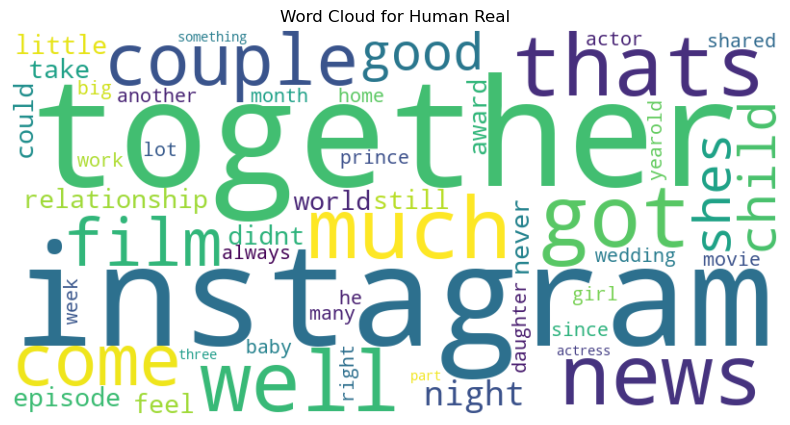

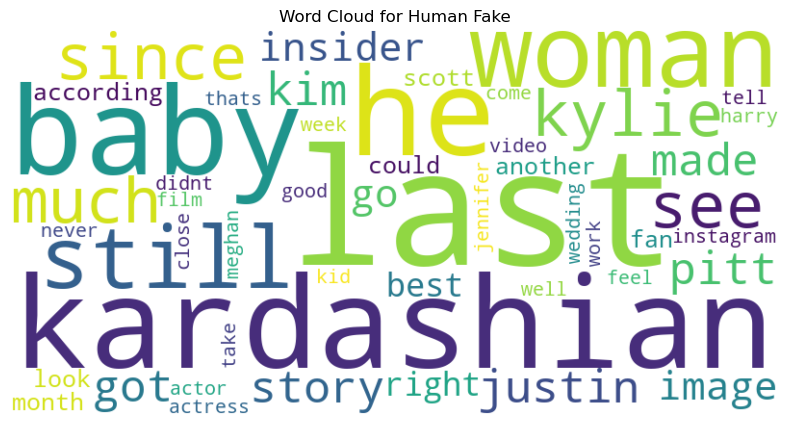

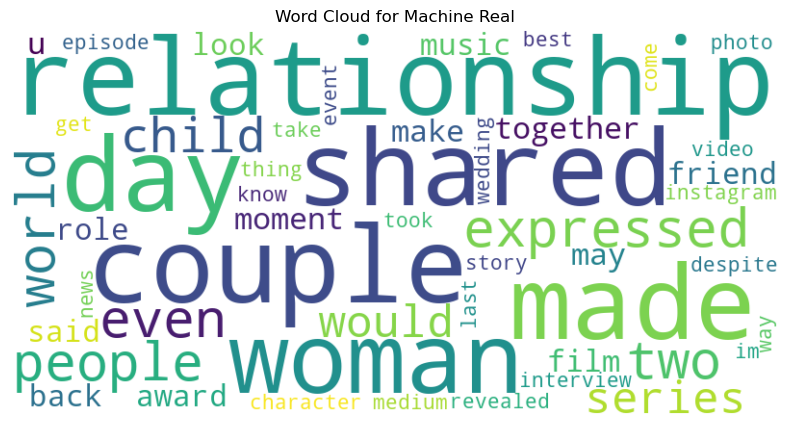

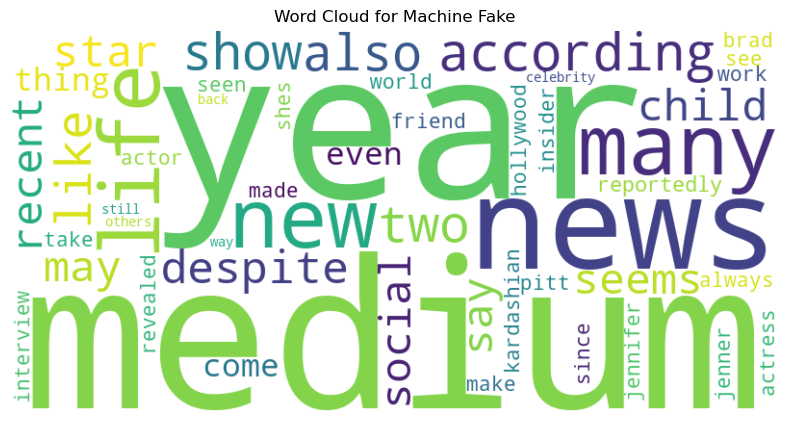

In [203]:
from nltk import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Modified function to return words with frequencies between min_freq and max_freq
def get_filtered_tokens(tokens, min_freq, max_freq):
    freq_dist = FreqDist(tokens)
    filtered_tokens = {word: count for word, count in freq_dist.items() if min_freq <= count <= max_freq}
    return filtered_tokens


# Function to generate and save word cloud
def generate_word_cloud(filtered_tokens, category_name):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(filtered_tokens)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {category_name}")
    plt.savefig(f"{category_name}_word_cloud.png")
    plt.show()

filtered_tokens_hr = get_filtered_tokens(tokens_hr, 100, 2000)
# Sort the tokens and get the top 50
top_tokens_hr = dict(sorted(filtered_tokens_hr.items(), key=lambda item: item[1], reverse=True)[:50])
generate_word_cloud(top_tokens_hr, "Human Real")

filtered_tokens_hf = get_filtered_tokens(tokens_hf, 100, 2000)
top_tokens_hf = dict(sorted(filtered_tokens_hf.items(), key=lambda item: item[1], reverse=True)[:50])
generate_word_cloud(top_tokens_hf, "Human Fake")

filtered_tokens_mr = get_filtered_tokens(tokens_mr, 100, 2000)
top_tokens_mr = dict(sorted(filtered_tokens_mr.items(), key=lambda item: item[1], reverse=True)[:50])
generate_word_cloud(top_tokens_mr, "Machine Real")

filtered_tokens_mf = get_filtered_tokens(tokens_mf, 100, 2000)
top_tokens_mf = dict(sorted(filtered_tokens_mf.items(), key=lambda item: item[1], reverse=True)[:50])
generate_word_cloud(top_tokens_mf, "Machine Fake")

# Data labeling and preparation

**Text Concatenation and Cleaning:**

* Purpose: Combine texts from two distinct categories (e.g., Human Real and Machine Fake) into a single dataset. This facilitates a comprehensive comparison during model training.
* Process: Standardize formatting and remove extraneous content to ensure uniformity across the dataset. This may involve stripping unnecessary HTML tags, correcting typographical errors, and standardizing the use of language to improve model readability and performance.

This process was done before and we use text data generated from it.
 
## Labeling:

* Procedure: Assign binary labels to each text instance, categorizing them as either human-generated (0) or AI-generated (1). This labeling is crucial for supervised learning, where the model is trained to predict the category of new, unseen texts.
* Significance: Accurate labeling is critical for training, as it directly influences the model's learning and its subsequent predictive accuracy.


In [204]:
from sklearn.metrics import accuracy_score, classification_report

# Assigning labels for each comparison
labels_hr_vs_mf = [0] * len(HR) + [1] * len(MF)
labels_hf_vs_mf = [0] * len(HF) + [1] * len(MF)
labels_mr_vs_mf = [0] * len(MR) + [1] * len(MF)
labels_hf_vs_mr = [0] * len(HF) + [1] * len(MR)
labels_hr_vs_mr = [0] * len(HR) + [1] * len(MR)
labels_hr_vs_hf = [0] * len(HR) + [1] * len(HF)

#Separate for Human vs AI in general
labels_hr_hf = [0] * (len(HR) + len(HF))
labels_mr_mf = [1] * (len(MR) + len(MF))

labels_human_machine = labels_hr_hf + labels_mr_mf


## Splitting Data:

* Objective: Divide the dataset into training and testing subsets to validate the model’s effectiveness on data it has not encountered during the training phase.
* Details: Typically, the data is split into an 80/20 ratio, where 80% is used for training the model, and the remaining 20% serves as the test set.

In [205]:
# Splitting the data for each comparison

X_train_mr_vs_mf, X_test_mr_vs_mf, y_train_mr_vs_mf, y_test_mr_vs_mf = train_test_split(pd.concat([MR, MF], ignore_index=True), labels_mr_vs_mf, test_size=0.2, random_state=42)

X_train_hr_vs_hf, X_test_hr_vs_hf, y_train_hr_vs_hf, y_test_hr_vs_hf = train_test_split(pd.concat([HR, HF], ignore_index=True), labels_hr_vs_hf, test_size=0.2, random_state=42)

# Splitting the data for the comparison between human-generated and machine-generated text
X_train_human_machine, X_test_human_machine, y_train_human_machine, y_test_human_machine = train_test_split(pd.concat([pd.concat([HR, HF]), pd.concat([MR, MF])], ignore_index=True),labels_human_machine,test_size=0.2,random_state=42)


## Vectorization:

* Technique: Implement TF-IDF vectorization to convert text into a numerical format. This step transforms the raw text into a feature set that quantifies the importance of words relative to their frequency in the document and across the corpus.
* Rationale: This method helps in emphasizing words that are unique to particular documents, enhancing the model’s ability to distinguish between different types of text based on their content.


In [208]:

tfidf_vectorizer_mr_vs_mf = TfidfVectorizer(max_features=4000)
X_train_mr_vs_mf_tfidf = tfidf_vectorizer_mr_vs_mf.fit_transform(X_train_mr_vs_mf)
X_test_mr_vs_mf_tfidf = tfidf_vectorizer_mr_vs_mf.transform(X_test_mr_vs_mf)


tfidf_vectorizer_hr_vs_hf = TfidfVectorizer(max_features=4000)
X_train_hr_vs_hf_tfidf = tfidf_vectorizer_hr_vs_hf.fit_transform(X_train_hr_vs_hf)
X_test_hr_vs_hf_tfidf = tfidf_vectorizer_hr_vs_hf.transform(X_test_hr_vs_hf)


# Create TF-IDF vectorizer for human vs. machine comparison
tfidf_vectorizer_human_machine = TfidfVectorizer(max_features=4000)
X_train_human_machine_tfidf = tfidf_vectorizer_human_machine.fit_transform(X_train_human_machine)
X_test_human_machine_tfidf = tfidf_vectorizer_human_machine.transform(X_test_human_machine)

In [ ]:
print(all_text['filtered_text'].head()) 

In [ ]:
print("Training Features Shape:", X_train_human_machine_tfidf.shape)
print("Training Labels Length:", len(y_train_human_machine))
print("Testing Features Shape:", X_test_human_machine_tfidf.shape)
print("Testing Labels Length:", len(y_test_human_machine))

### Building the XGBoost Model for Text Classification
XGBoost stands for Extreme Gradient Boosting, a powerful machine learning technique that has gained popularity due to its performance in numerous machine learning competitions. Unlike traditional algorithms, XGBoost handles various types of structured data. It's particularly effective in classification tasks, including text classification, where it can discern intricate patterns in data.

#### Methods:

* The **"train_and_evaluate_xgboost"** function encapsulates the training and evaluation process of the XGBoost model. The model utilizes a series of decision trees that are trained in a gradient boosting framework.
* During training, features are extracted from text data, which has been previously transformed into a numerical format using techniques like TF-IDF vectorization. These features may include word frequencies or other text statistics that are significant for classification.
XGBoost optimizes both the computational efficiency and model performance by employing a level-wise growth strategy for the trees and incorporating regularized learning to prevent overfitting.
* In the evaluation phase, the model's accuracy in categorizing text as either human or machine-generated is assessed using a separate test dataset.


#### Rationale/Assumptions:

* We assume that texts generated by machines exhibit certain identifiable patterns that differ from those in human writing. These differences could be in the usage frequency of certain words, phrases, or grammatical structures.
* By applying XGBoost to a labeled dataset comprising both human and machine-generated texts, the model is trained to identify and leverage these unique features, improving its predictive accuracy.

#### Limitations/Caveats:

* While XGBoost is effective for a range of classification problems, its performance heavily relies on the quality of feature engineering and the representativeness of the training data. Inadequate or biased data can lead to poor generalization to new, unseen texts.
* XGBoost, being a gradient boosting model, might also be less intuitive to tune compared to more straightforward models, as it involves setting numerous hyperparameters like learning rate, depth of trees, and number of trees.
* Unlike deep learning models, XGBoost does not inherently process sequential data, which can be a limitation for complex linguistic tasks requiring understanding of long-term dependencies.

In [209]:
# Function to train and evaluate the XGBoost model
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

def train_and_evaluate_xgboost(X_train, X_test, y_train, y_test, max_depth=3, n_estimators=100):
    try:
        # Model initialization with additional parameters
        model = XGBClassifier(
            use_label_encoder=False, 
            eval_metric=['logloss', 'error'],
            max_depth=max_depth,
            n_estimators=n_estimators
        )
        
        # Define evaluation set
        eval_set = [(X_train, y_train), (X_test, y_test)]

        # Model training with evaluation history
        model.fit(X_train, y_train, eval_set=eval_set, verbose=False, early_stopping_rounds=10)

        # Model evaluation
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        
        # Retrieve performance metrics
        history = model.evals_result()
        training_accuracy = [1 - x for x in history["validation_0"]["error"]]
        validation_accuracy = [1 - x for x in history["validation_1"]["error"]]
        
        history["accuracy"] = training_accuracy
        history["val_accuracy"] = validation_accuracy

        return model, accuracy, report, history
    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None, None, None



# Training and evaluating the model for MR vs MF comparison
model_mr_vs_mf, accuracy_mr_vs_mf, _, history_mr_vs_mf = train_and_evaluate_xgboost(
    X_train_mr_vs_mf_tfidf,
    X_test_mr_vs_mf_tfidf,
    y_train_mr_vs_mf,
    y_test_mr_vs_mf
)

# Training and evaluating the model for HR vs HF comparison
model_hr_vs_hf, accuracy_hr_vs_hf, _, history_hr_vs_hf = train_and_evaluate_xgboost(
    X_train_hr_vs_hf_tfidf,
    X_test_hr_vs_hf_tfidf,
    y_train_hr_vs_hf,
    y_test_hr_vs_hf
)

# Train and evaluate the XGBoost model for human vs. machine comparison
model_human_machine, accuracy_human_machine, _, history_human_machine = train_and_evaluate_xgboost(
    X_train_human_machine_tfidf, 
    X_test_human_machine_tfidf, 
    y_train_human_machine, 
    y_test_human_machine
)

/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/opt/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



# Results and Visuals

#### Visualization of Model Training and Validation Metrics
  1. **Accuracy Plot**: Show both training and validation accuracy over epochs. Training accuracy indicates how well the model is learning the dataset, while validation accuracy shows how well the model generalizes to new data.
  2. **Loss Plot**: Display training and validation loss over epochs. Training loss measures how well the model fits the data, whereas validation loss measures model performance on the unseen data.
- **Rationale**:
  - **Accuracy and Loss Trends**:
    - **Consistent Increase in Validation Accuracy** and **Decrease in Validation Loss** suggest good model generalization.
    - **Large Gaps between Training and Validation Metrics** may indicate **overfitting**, where the model learns the training data too well, including the noise and errors, at the expense of its ability to generalize.
    - **High Validation Loss** or **Plateaus in Validation Accuracy** can signal **underfitting**, where the model does not perform well even on training data, suggesting it is too simple.
- **Outputs**:
  - A combined plot with training and validation accuracy and loss, providing a visual representation of the model's learning curve and its ability to generalize across epochs.

In [210]:
import matplotlib.pyplot as plt

def plot_history(history, comparison_name):
    plt.figure(figsize=(12, 6))
    plt.suptitle(f'Model Training and Validation Metrics for {comparison_name}')
    
    plt.subplot(1, 2, 1)
    train_accuracy = history['accuracy']
    val_accuracy = history['val_accuracy']
    epochs = range(1, len(train_accuracy) + 1)
    plt.plot(epochs, train_accuracy, label='Training Accuracy')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['validation_0']['logloss'], label='Training Log Loss')
    plt.plot(history['validation_1']['logloss'], label='Validation Log Loss')
    plt.title('Log Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Log Loss')
    plt.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


In [211]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X, y, ax=None, cmap=plt.cm.Blues, display_labels=None):
    cm = confusion_matrix(y, model.predict(X))
    if ax is None:
        fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    if display_labels is None:
        display_labels = np.unique(y)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=display_labels, yticklabels=display_labels,
           title='Confusion Matrix',
           ylabel='True label',
           xlabel='Predicted label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    ax.grid(False)
    return ax



Accuracy HR vs HF: 0.7627427184466019


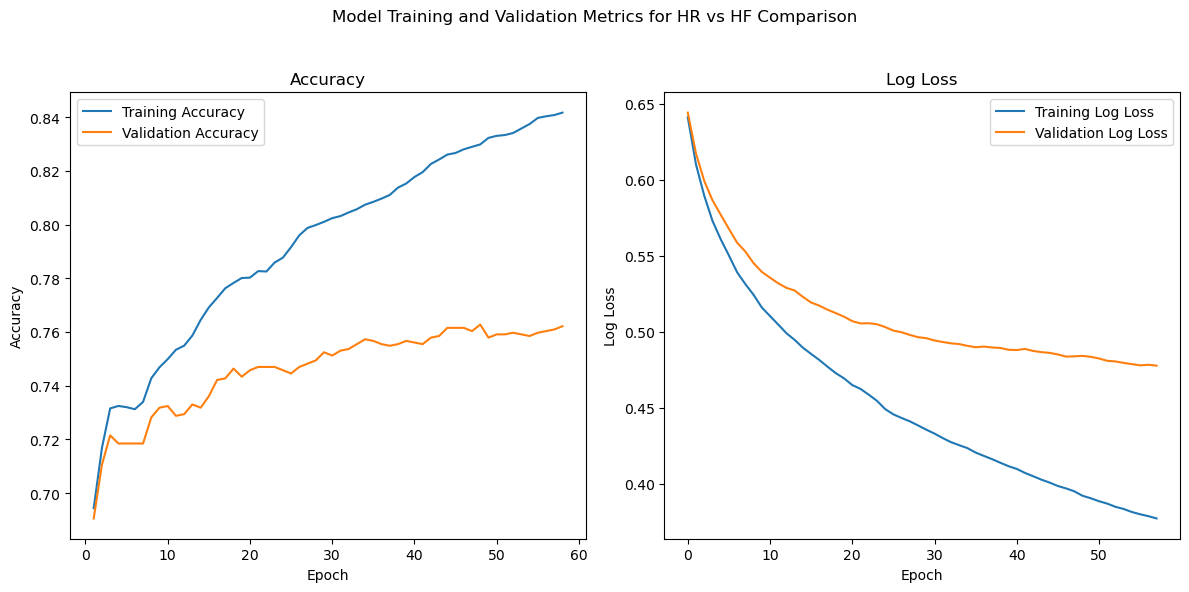

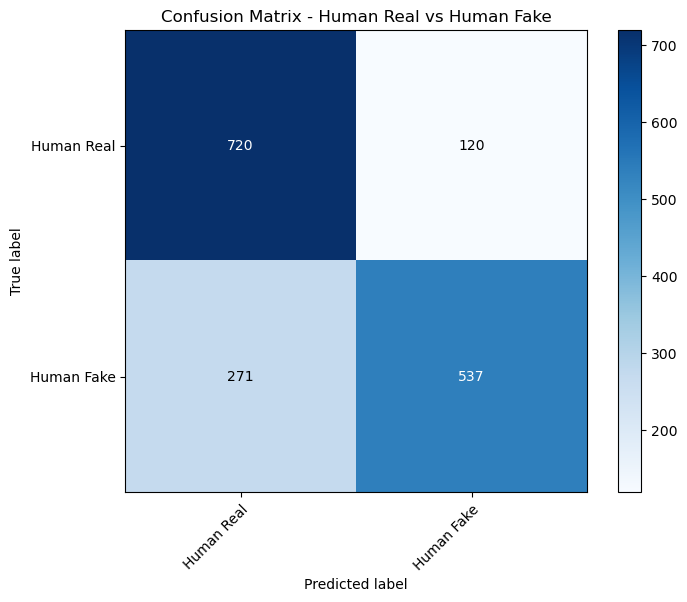

In [213]:
print(f"Accuracy HR vs HF: {accuracy_hr_vs_hf}")
plot_history(history_hr_vs_hf, 'HR vs HF Comparison')

fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(model_hr_vs_hf, X_test_hr_vs_hf_tfidf, y_test_hr_vs_hf, ax=ax, cmap=plt.cm.Blues, display_labels=['Human Real', 'Human Fake'])
ax.set_title('Confusion Matrix - Human Real vs Human Fake')
plt.show()

Accuracy MR vs MF: 0.9212598425196851


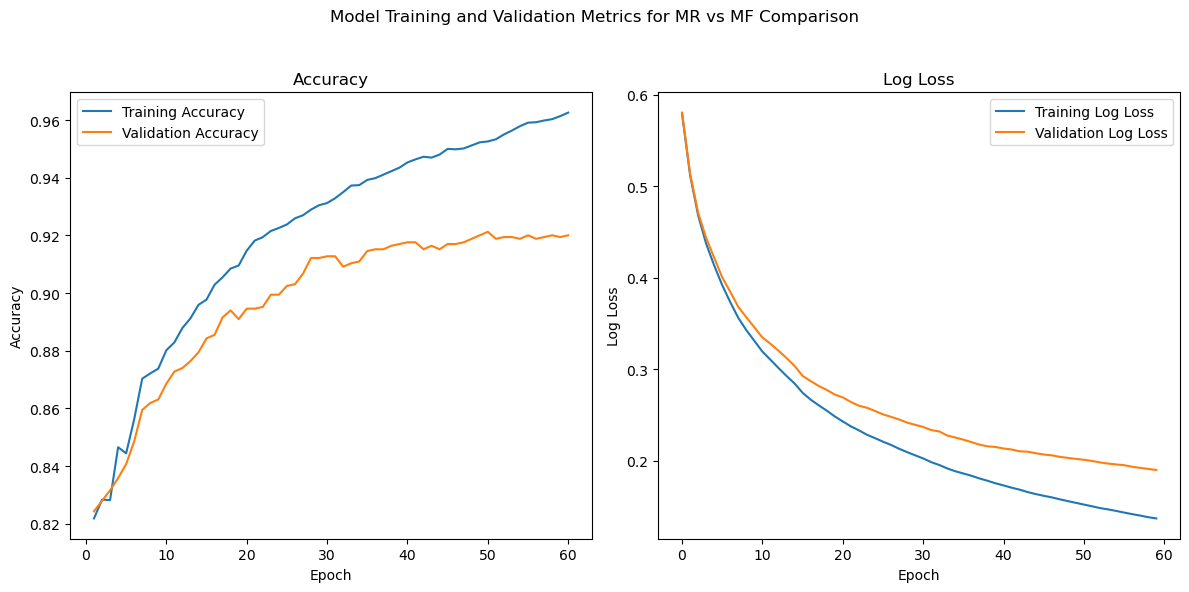

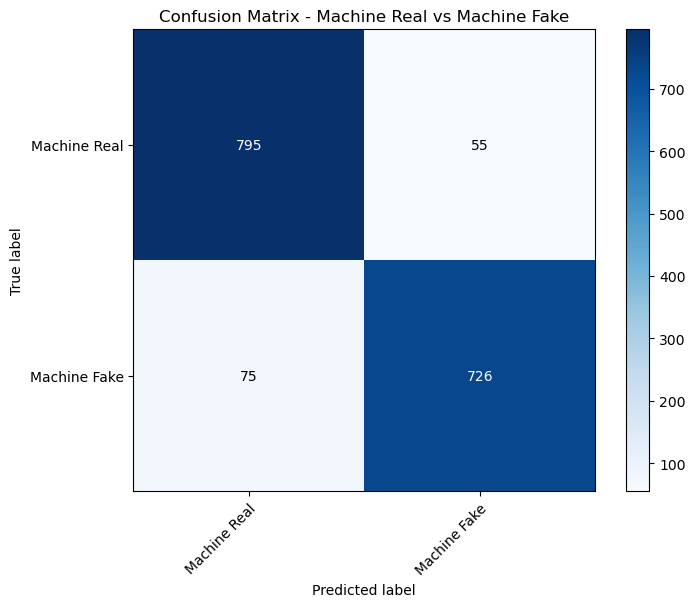

In [214]:
print(f"Accuracy MR vs MF: {accuracy_mr_vs_mf}")
plot_history(history_mr_vs_mf, 'MR vs MF Comparison')

fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(model_mr_vs_mf, X_test_mr_vs_mf_tfidf, y_test_mr_vs_mf, ax=ax, cmap=plt.cm.Blues, display_labels=['Machine Real', 'Machine Fake'])
ax.set_title('Confusion Matrix - Machine Real vs Machine Fake')
plt.show()

Accuracy All Human vs All Machine: 0.9144936325045482


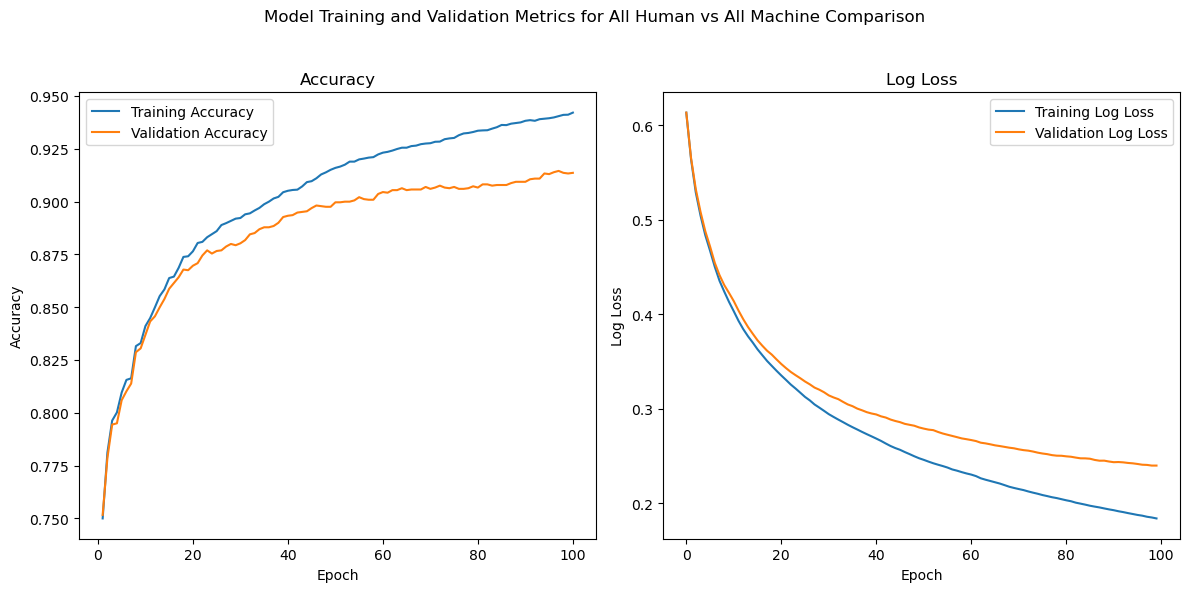

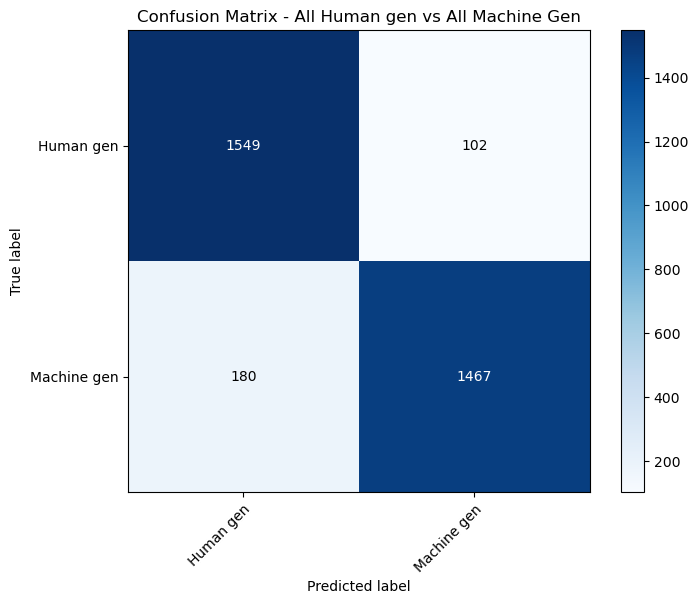

In [215]:
print(f"Accuracy All Human vs All Machine: {accuracy_human_machine}")
plot_history(history_human_machine, 'All Human vs All Machine Comparison')


fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(model_human_machine, X_test_human_machine_tfidf, y_test_human_machine, ax=ax, cmap=plt.cm.Blues, display_labels=['Human gen', 'Machine gen'])
ax.set_title('Confusion Matrix - All Human gen vs All Machine Gen')
plt.show()

# Example of one of the test models

In [ ]:
# from sklearn.metrics import confusion_matrix, accuracy_score

# def display_classification_examples(X_test_tfidf, y_test, predictions, vectorizer):
#     # Convert TF-IDF back to text
#     X_test_texts = [" ".join(words_array) for words_array in vectorizer.inverse_transform(X_test_tfidf)]
    
#     # Finding misclassified and correctly classified indices
#     misclassified_indices = []
#     correctly_classified_indices = []
#     for i, (actual, predicted) in enumerate(zip(y_test, predictions)):
#         if actual != predicted:
#             misclassified_indices.append(i)
#         else:
#             correctly_classified_indices.append(i)
    
#     # Display examples
#     print("\nCorrectly Classified Examples:")
#     for i in correctly_classified_indices[:3]:  # Display first 3 correctly classified examples
#         print(f"Text: {X_test_texts[i]}\nLabel: {y_test[i]}\n")
    
#     print("Misclassified Examples:")
#     for i in misclassified_indices[:3]:  # Display first 3 misclassified examples
#         print(f"Text: {X_test_texts[i]}\nActual Label: {y_test[i]}, Predicted Label: {predictions[i]}\n")


# display_classification_examples(X_test_hr_vs_mf_tfidf, y_test_hr_vs_mf, predictions_hr_vs_mf, tfidf_vectorizer_hr_vs_mf)



# Poltifact(New) dataset Validation (Work in Progress)


In [216]:
# Add a 'label' column to PHR_df
PHR_df['label'] = 0  # Real

# Add a 'label' column to PHF_df
PHF_df['label'] = 1  # Fake

PMR_df['label'] = 0 # Machine Real

PMF_df['label'] = 1 # Machine Fake

In [217]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import re
from nltk.tokenize import word_tokenize


def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = text.lower()  # Convert text to lowercase
    tokens = word_tokenize(text)  # Tokenize the cleaned text
    filtered_text = ' '.join([word for word in tokens if word not in stop_words])
    return filtered_text

# Apply the function and store results as a clean text string
for df in [PHR_df, PHF_df, PMF_df, PMR_df]:
    df['text_clean'] = df['text'].apply(remove_stopwords)


# Apply this function to your PolitiFact DataFrames
PHR_df['text_clean'] = PHR_df['text'].apply(remove_stopwords)
PHF_df['text_clean'] = PHF_df['text'].apply(remove_stopwords)
PMF_df['text_clean'] = PMF_df['text'].apply(remove_stopwords)
PMR_df['text_clean'] = PMR_df['text'].apply(remove_stopwords)


df_human = pd.concat([PHR_df, PHF_df], ignore_index=True)
df_machine = pd.concat([PMR_df, PMF_df], ignore_index=True)

all_combine =pd.concat([df_human,df_machine], ignore_index=True)

df_human['label'] = 0  # Human-generated
df_machine['label'] = 1  # Machine-generated

In [219]:
# Combine the dataframes for human texts

phr_phf_combine = pd.concat([PHR_df, PHF_df], ignore_index=True)
X_human_combined_tfidf = tfidf_vectorizer_hr_vs_hf.transform(phr_phf_combine['text_clean'])  # Ensure 'text' is the correct column
X_human_combined_tfidf = tfidf_vectorizer_hr_vs_hf.transform(phr_phf_combine['text_clean'])

y_human_combined_tfidf = phr_phf_combine['label']


# Combine the dataframes for machine texts
pmr_pmf_combine = pd.concat([PMR_df, PMF_df], ignore_index=True)
X_machine_combined_tfidf = tfidf_vectorizer_mr_vs_mf.transform(pmr_pmf_combine['text_clean'])  # Ensure 'text' is the correct column
y_machine_combined_tfidf = pmr_pmf_combine['label']

# for all human vs machine
all_combine =pd.concat([df_human,df_machine], ignore_index=True)
X_all_combined_tfidf = tfidf_vectorizer_human_machine.transform(all_combine['text_clean'])
y_all_combined_tfidf = all_combine['label']

# Predict and evaluate for human texts
y_pred_human = model_hr_vs_hf.predict(X_human_combined_tfidf)
cm_human = confusion_matrix(y_human_combined_tfidf, y_pred_human)

# Predict and evaluate for machine texts
y_pred_machine = model_mr_vs_mf.predict(X_machine_combined_tfidf)
cm_machine = confusion_matrix(y_machine_combined_tfidf, y_pred_machine)

# Predict and evaluate for all texts
y_pred_all=model_human_machine.predict(X_all_combined_tfidf)



In [220]:

# Evaluate the accuracy for human texts
accuracy_human = accuracy_score(y_human_combined_tfidf, y_pred_human)
print("Accuracy for Human Texts:", accuracy_human)

# Evaluate the accuracy for machine texts
accuracy_machine = accuracy_score(y_machine_combined_tfidf, y_pred_machine)
print("Accuracy for Machine Texts:", accuracy_machine)


#Evaluate the accuracy for human vs machine
accuracy_all_human_machine=accuracy_score(y_all_combined_tfidf,y_pred_all)
print("Accuracy for all human and machine texts:",accuracy_all_human_machine)


Accuracy for Human Texts: 0.6460481099656358
Accuracy for Machine Texts: 0.8864628820960698
Accuracy for all human and machine texts: 0.8711538461538462


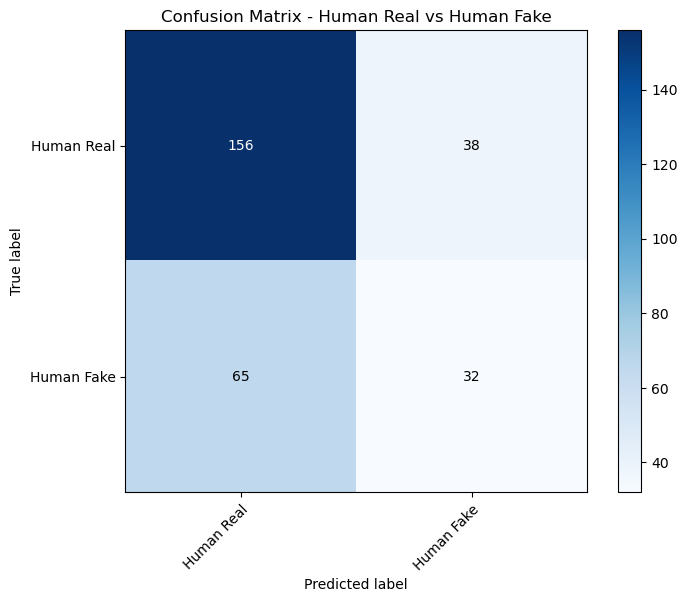

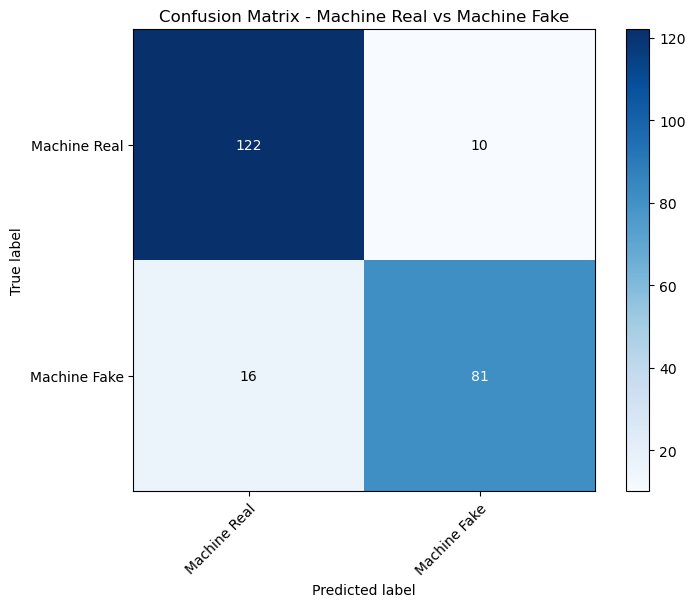

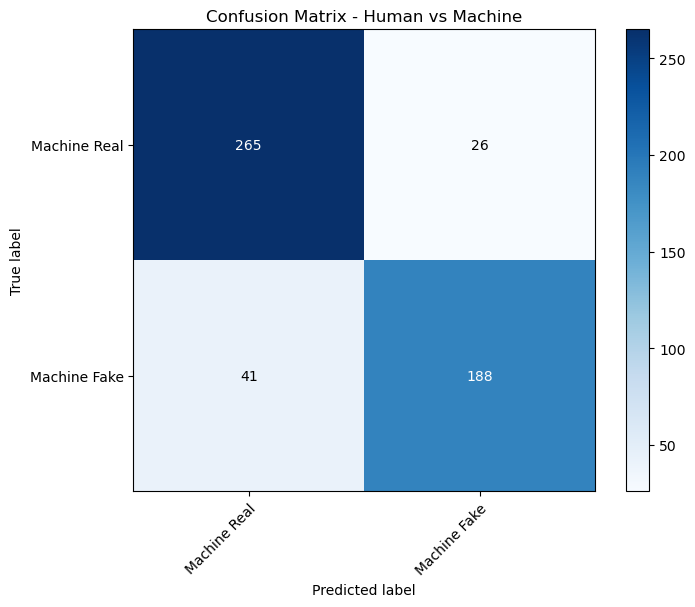

In [221]:
## For Human Real and Human Fake accuracy.
fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(model_hr_vs_hf, X_human_combined_tfidf, y_human_combined_tfidf, ax=ax, cmap=plt.cm.Blues, display_labels=['Human Real', 'Human Fake'])
ax.set_title('Confusion Matrix - Human Real vs Human Fake')
plt.show()


## for Machine real and Machine Fake
fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(model_mr_vs_mf, X_machine_combined_tfidf, y_machine_combined_tfidf, ax=ax, cmap=plt.cm.Blues, display_labels=['Machine Real', 'Machine Fake'])
ax.set_title('Confusion Matrix - Machine Real vs Machine Fake')
plt.show()


## For all human and machine text
fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(model_human_machine, X_all_combined_tfidf, y_all_combined_tfidf, ax=ax, cmap=plt.cm.Blues, display_labels=['Machine Real', 'Machine Fake'])
ax.set_title('Confusion Matrix - Human vs Machine')
plt.show()